<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_Naturallanguage_study/blob/main/tensorflow_naturallanguage4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [10]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

print(corpus[0])
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

in the town of athy one jeremy lanigan 
{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres'

In [11]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
  
print(input_sequences)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(input_sequences)
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
print(xs[0],labels[0])

ys = tf.keras.utils.to_categorical(labels, num_classes=263)

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 88, 13, 2], [85, 86, 87, 33, 44, 88, 13, 2, 45], [1, 89], [1, 89,

In [12]:
model =Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 6s 5ms/step - loss: 5.5661 - accuracy: 0.0397
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5374 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4685 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 5.2783 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1197 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0654 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0250 - accuracy: 0.0596
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9982 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9677 - accuracy: 0.0530
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9320 - accuracy: 0.0486
Epoch 11/

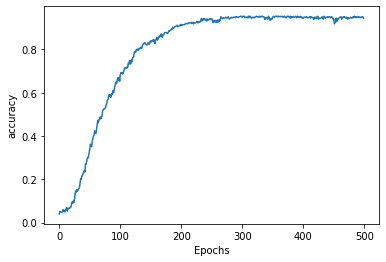

In [13]:
import matplotlib.pyplot as plt


def graph(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
graph(history,'accuracy')

In [14]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  classes=np.argmax(predicted,axis=1)
  output_word=''
  for i,j in tokenizer.word_index.items():
    if j==classes:
      output_word = i
      break
  seed_text += " " + output_word
print(seed_text)

Laurence went to dublin bees plenty a cask cask cask cask me a call call ask had at me a call ask pound pound pound pound pound pound pound pound suppose up fainted fainted fainted fainted fainted fainted as powerful and meelia murther rose rose me a call call pound had at me a call ask ask pound pound pound pound pound pound suppose up fainted fainted fainted fainted fainted fainted as powerful and meelia murther rose rose me a call call pound had at me a call ask ask pound pound pound pound pound pound suppose up fainted fainted fainted fainted fainted fainted


In [15]:
tokenizer.word_index.items()

dict_items([('and', 1), ('the', 2), ('a', 3), ('in', 4), ('all', 5), ('i', 6), ('for', 7), ('of', 8), ('lanigans', 9), ('ball', 10), ('were', 11), ('at', 12), ('to', 13), ('she', 14), ('stepped', 15), ('his', 16), ('girls', 17), ('as', 18), ('they', 19), ('til', 20), ('he', 21), ('again', 22), ('got', 23), ('boys', 24), ('round', 25), ('that', 26), ('her', 27), ('there', 28), ('three', 29), ('weeks', 30), ('up', 31), ('out', 32), ('him', 33), ('was', 34), ('spent', 35), ('learning', 36), ('new', 37), ('steps', 38), ('long', 39), ('away', 40), ('left', 41), ('friends', 42), ('relations', 43), ('when', 44), ('wall', 45), ('myself', 46), ('nice', 47), ('just', 48), ('dancing', 49), ('merry', 50), ('tipped', 51), ('me', 52), ('soon', 53), ('time', 54), ('old', 55), ('their', 56), ('them', 57), ('danced', 58), ('dublin', 59), ('an', 60), ('put', 61), ('leg', 62), ('miss', 63), ('fainted', 64), ('from', 65), ('town', 66), ('athy', 67), ('one', 68), ('jeremy', 69), ('lanigan', 70), ('battered

In [16]:

!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 61.5MB/s]


In [17]:
tokenizer = Tokenizer()
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [18]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

print(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
377/377 [==============================] - 4s 6ms/step - loss: 6.5884 - accuracy: 0.0778
Epoch 2/100
377/377 [==============================] - 2s 6ms/step - loss: 5.6685 - accuracy: 0.1220
Epoch 3/100
377/377 [==============================] - 2s 6ms/step - loss: 4.7196 - accuracy: 0.1757
Epoch 4/100
377/377 [==============================] - 2s 6ms/step - loss: 3.7782 - accuracy: 0.2548
Epoch 5/100
377/377 [==============================] - 2s 6ms/step - loss: 2.9492 - accuracy: 0.3640
Epoch 6/100
377/377 [==============================] - 2s 6ms/step - loss: 2.3782 - accuracy: 0.4626
Epoch 7/100
377/377 [==============================] - 2s 6ms/step - loss: 1.8891 - accuracy: 0.5578
Epoch 8/100
377/377 [==============================] - 2s 6ms/step - loss: 1.5961 - accuracy: 0.6156
Epoch 9/100
377/377 [==============================] - 2s 6ms/step - loss: 1.3673 - accuracy: 0.6705
Epoch 10/100
377/377 [==============================] - 2s 6ms/step - loss: 1.2358 - accura

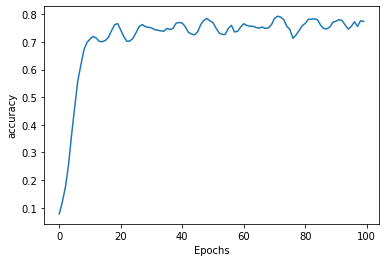

In [28]:
graph(history,'accuracy')

In [29]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list, verbose=0)
  classes=np.argmax(predicted,axis=1)
  output_word=''
  for i,j in tokenizer.word_index.items():
    if j==classes:
      output_word = i
      break
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this noon for the same though you cannot hear me now mary i lies loud and clear her thousand love forever and i shall might ask tell lovd to stray at the grass grows on the weirs winds blow high god at grass me saying keep them what no more on earth i see no more more saint patricks them hes sweetly out across the sky heart was weary the land far away cross the sea may let my company star tree love gone on his clung and the linnet too ra loo loud and shrill was loud and beguiled molly
